## **Graduate Rotational Internship Program by The Sparks Foundation**

## **BIJURIKA BANDYOPADHYAY**

## **Task 2: Prediction using Supervised Machine Learning**

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

%matplotlib inline

In [7]:
data = pd.read_excel(r"C:\Users\HP\Desktop\linear_regression.xlsx")
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Descriptive statistics details

In [58]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## *VISUAL REPRESENTATION*

*To analyse the given data visually, we plot the data points on a 2D graph and also see the relation between the dependent variable 'Scores obtained' and independent variable 'Hours studied'*

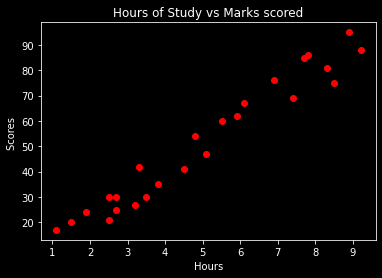

In [79]:
plt.scatter(x=data['Hours'],y=data['Scores'],color='r')
plt.title('Hours of Study vs Marks scored')
plt.xlabel('Hours')
plt.ylabel('Scores ')
plt.rcParams['axes.facecolor'] = 'black'
plt.show()

 **In the above graph, we can say that there is a positive linear relation between the variables 'Scores' and 'Hours'**

*The correlation coefficient will give a clear representation of how much they are related.*

In [12]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### The value of the correlation coefficient is 0.976191, which indicates that the two variables 'Hours' and 'Scores' are highly correlated.

## **Preparing and training the data**

*Dividing the data into 'attributes' (inputs) and 'labels' (output).*

In [13]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

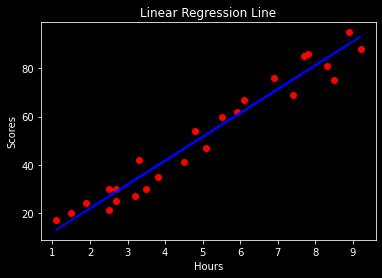

(array([9.91065648]), 2.018160041434662)

In [88]:
line = model.coef_ * X + model.intercept_
plt.xlabel('Hours')
plt.ylabel("Scores")
plt.title("Linear Regression Line")
plt.scatter(X, Y, color = 'red')
plt.plot(X, line, color = 'blue')
plt.rcParams['axes.facecolor'] = 'black'
plt.show()
model.coef_, model.intercept_

*The regression line is the best fit*

## Making Predictions

In [36]:
# Predicting the scores
Y_pred = model.predict(X_test)
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [34]:
# Comparing Actual vs Predicted
pred_data = pd.DataFrame({'Actual': Y_test , 'Predicted': Y_pred})
pred_data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### *Graphical Representation of the above comparison*

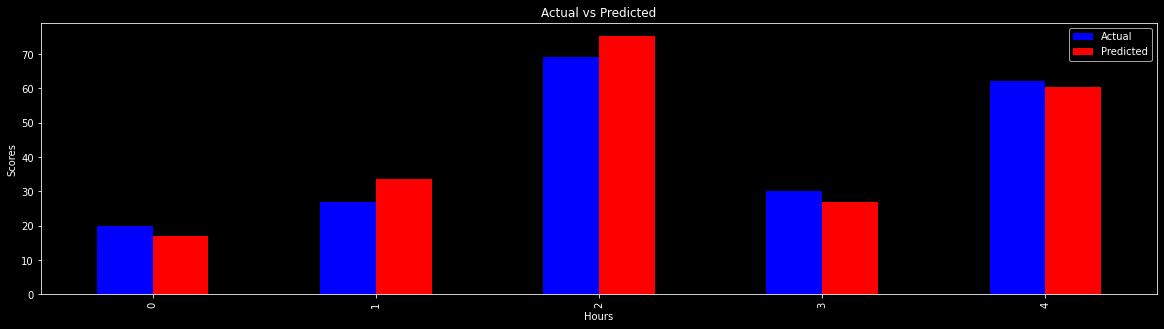

In [82]:
graph = pred_data.head()
graph.plot(kind='bar',figsize=(20,5),color=('blue','red'))
plt.title("Actual vs Predicted")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.rcParams['axes.facecolor'] = 'black'
plt.show()

### Evaluating test and train score

In [101]:
# Evaluating train score and test score
print(f'The train score: {model.score(X_train,Y_train)}')
print(f'The test score: {model.score(X_test,Y_test)}')

The train score: 0.9515510725211552
The test score: 0.9454906892105354


## Evaluation of the model

In [98]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Coefficient of Determination:', metrics.r2_score(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Coefficient of Determination: 0.9454906892105354


*Since the value of R_sq i.e. Coefficient of determination is very close to 1, we can say that the performance of the model is good.*

In [100]:
# testing own data
hours = [[9.25]]
own_pred_data = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred_data[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


In [113]:
y = model.coef_*hours+model.intercept_
print(y)
if y == own_pred_data:
    print("Correct")

else: 
    print("Wrong")

[[93.69173249]]
Correct


### *Conclusion: 93.69 is the predicted score if a student studies for 9.25 hrs/day*